In [1]:
import numpy as np
from astropy.io import fits
import lime 
import matplotlib.pyplot as plt

In [2]:
hdul = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit15_1D_f99.fits', mode='update')
header = hdul[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header['FLUXSCAL'] = 1
header
    
hdul.flush()

In [3]:
#hdul = fits.open('../../../reduccion/NGC1313/cal/slit1copy_1D001.fits', mode='update')
#header = hdul[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
#header['FLUXSCAL'] = 1
#header
    
#hdul.flush()


In [4]:
print(header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2325 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-01T18:37:34' / Date FITS file was generated                  IRAF-TLM= '2024-07-01T18:37:34' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4025.53466796875 / RA at R

In [5]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [6]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit15_1D_f99.fits"

#load the data
wave, flux, hdr = import_1313_fits(fits_file)

In [7]:
# Galaxy redshift and the flux normalization
z_obj = 0.001568
normFlux = 1

In [8]:
spec15 = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

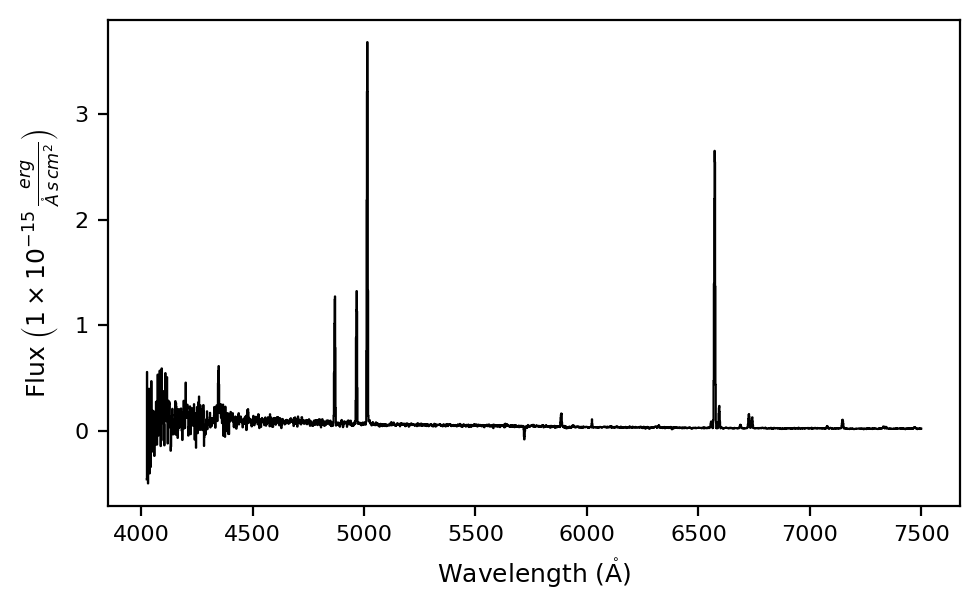

In [9]:
spec15.plot.spectrum(label='NGC1313')

In [10]:
spec15.fit.bands(6563)

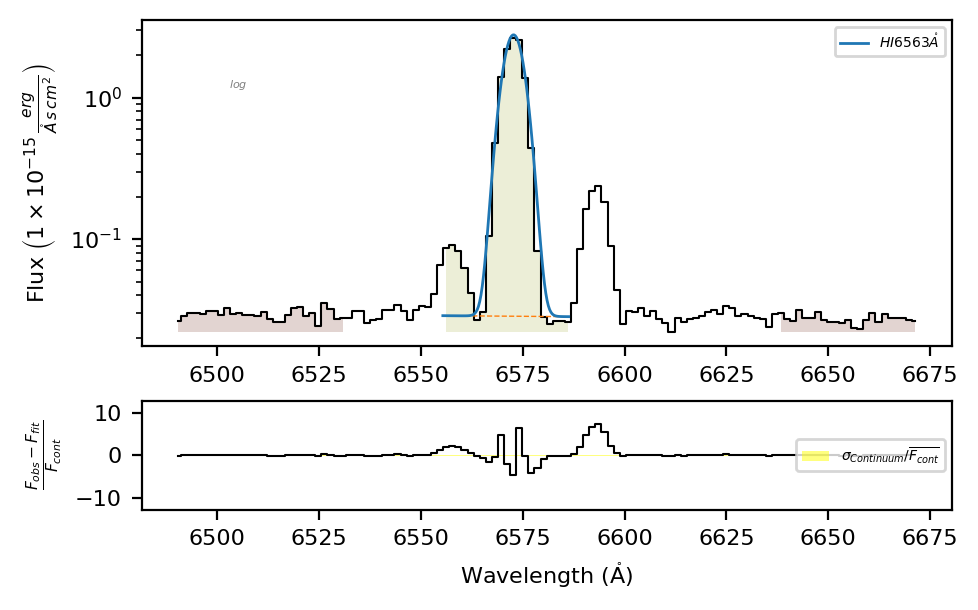

In [11]:
spec15.plot.bands()

In [12]:
# Line name and its location mask in the rest _frame
line = 'H1_6563A'
band_edges = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])

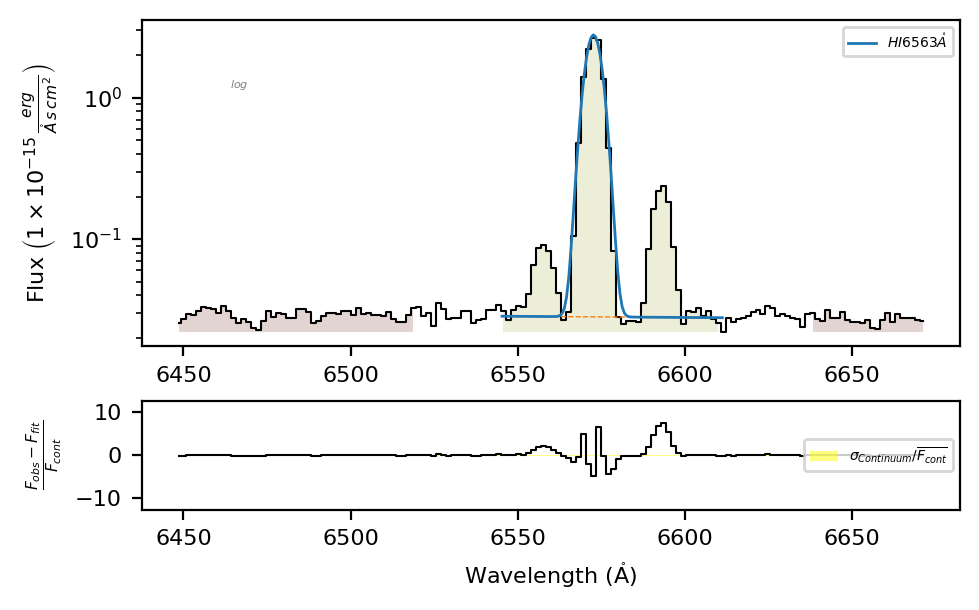

In [13]:
# Run the fitting and plot it
spec15.fit.bands(line, band_edges)
spec15.plot.bands()

In [14]:
# Fit configuration
line = 'H1_6563A_b'
fit_conf = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

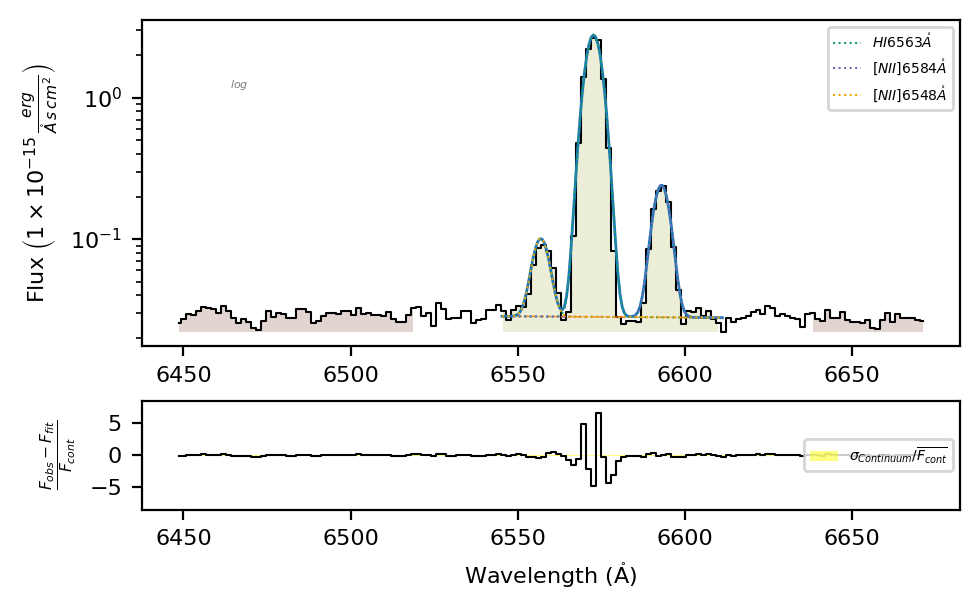

In [15]:
# New attempt including the fit configuration
spec15.fit.bands(line, band_edges, fit_conf=fit_conf)
spec15.plot.bands()

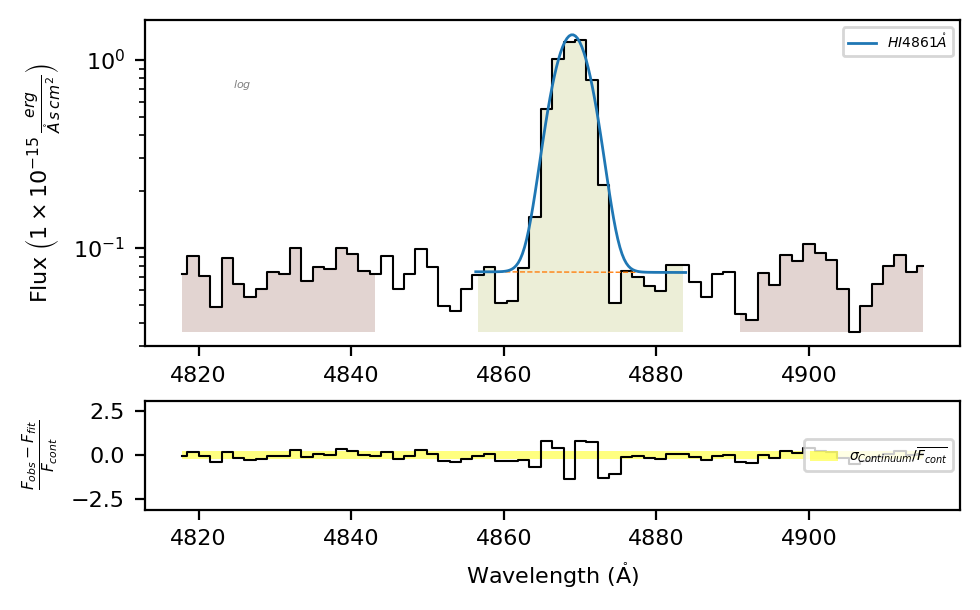

In [16]:
spec15.fit.bands(4861)
spec15.plot.bands()

In [17]:
spec15.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x7fc03fef3cd0>>

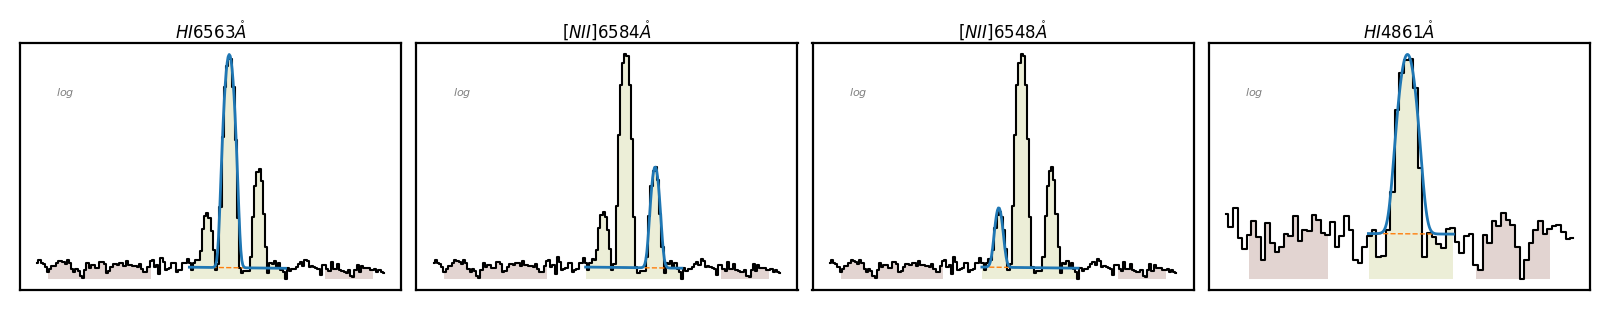

In [18]:
spec15.plot.grid()

In [19]:
spec15.save_frame('slit15_Hae_Hb_f99.txt')